In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [21]:
df.shape

(8555, 3)

In [22]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [23]:
df.corr()

,Height,Weight
Height,1.000000,0.922975
Weight,0.922975,1.000000


<AxesSubplot:>

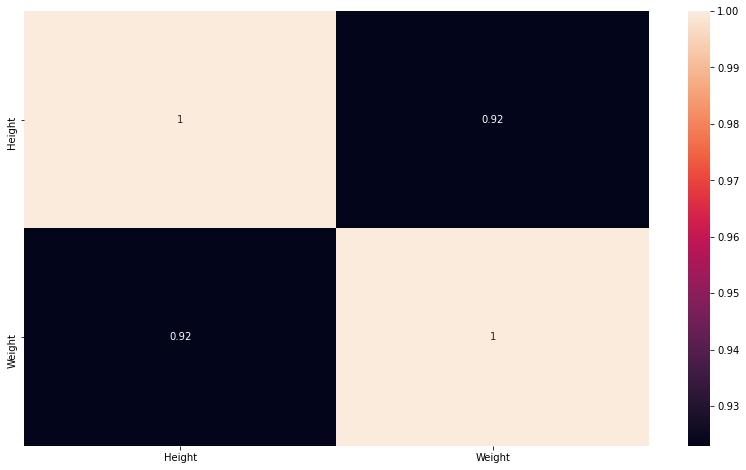

In [24]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

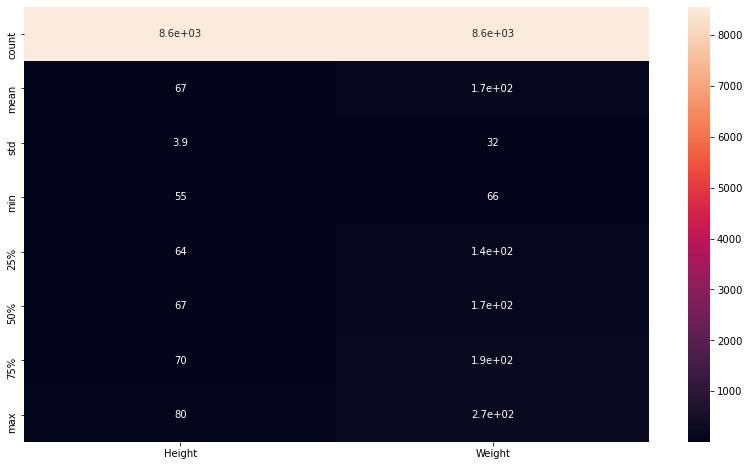

In [25]:
plt.figure(figsize=(14,8))
sns.heatmap(df.describe(),annot=True)

In [27]:
x=df.drop(['Weight'],axis=1)
x.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [28]:
y=df['Weight']
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

# Encoding

In [29]:
dummy = pd.get_dummies(x['Gender'], columns = x.Gender.unique())
dummy.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [30]:
x.drop('Gender', axis=1, inplace=True)

In [31]:
x=pd.concat([x,dummy],axis=1)
x.head()

,Height,Female,Male
0,73.847017,0,1
1,68.781904,0,1
2,74.110105,0,1
3,71.730978,0,1
4,69.881796,0,1


# Split dataset into train test

In [32]:
from sklearn.model_selection import train_test_split as tts

In [33]:
# train 70% ; test = 30%
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30)

# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
reg = LinearRegression()

In [36]:
reg.fit(xtrain, ytrain) #training

LinearRegression()

In [37]:
m = reg.coef_
m

array([ 5.94010415, -9.81447727,  9.81447727])

In [38]:
c = reg.intercept_
c 

-232.8196932237435

In [20]:
pred=reg.predict(xtest)
pred

array([113.81035137, 157.77271098, 166.4826001 , ..., 192.5958514 ,
       175.51225057,  94.92599149])

# KNN Regression

In [33]:
from sklearn.neighbors import KNeighborsRegressor


In [35]:
knn = KNeighborsRegressor(n_neighbors=100)

In [36]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=100)

In [38]:
y_pred=knn.predict(xtest)
y_pred

array([113.51843984, 157.5942202 , 166.96562982, ..., 193.10021529,
       176.4055344 , 100.14133465])

# Evaluate Model (Accuracy, MSE, MAE)

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
from sklearn.metrics import r2_score
print("Linear regression Accuracy:",r2_score(ytest, pred))
print("KNN regression Accuracy:",r2_score(ytest, y_pred))

Linear regression Accuracy: 0.8993408617260581
KNN regression Accuracy: 0.895985396827558


In [41]:
print("Linear Regression MSE:",mean_squared_error(ytest, pred)) 
print("KNN Regression MSE:",mean_squared_error(ytest, y_pred)) 

Linear Regression MSE: 104.22832378789285
KNN Regression MSE: 107.70276722042041


In [42]:
print("Linear Regression MAE:",mean_absolute_error(ytest, pred)) 
print("KNN Regression MAE:",mean_absolute_error(ytest, y_pred)) 

Linear Regression MAE: 8.008744322251637
KNN Regression MAE: 8.116535137470432
